# [사이킷런(Scikit-learn)](https://scikit-learn.org/stable/)

- 사이킷런은 파이썬의 머신러닝 라이브러리로 다양한 머신러닝 알고리즘을 사용할 수 있다.

- 그리고 Machine Learning 을 위한 유용하고 강력한 라이브러리 중 하나 이다.
이 라이브러리는 분류, 회귀, 클러스터링, 차원 축소를 포함하여, Machine Learning 및 통계 모델링을 위한 효율적인 도구를 제공한다.

    - 지도 학습 알고리즘: 선형 회귀, SVM, Decision Tree 등
    - 비지도 학습 알고리즘: 클러스터링, 주 성분 분석(PCA), 요인 분석 등
벤치마크 용 데이터 셋 예제: 보스턴 주택 가격, 붓꽃 종류 분류, 손으로 쓴 숫자 이미지, 와인 분류 등
    - 데이터 전처리(preprocessing): 데이터 셋 분할, 데이터 스케일 조정, 수치적 데이터 전처리, 결측치 전처리 등
    - 모형 평가 및 선택(evaluation and selection)

<center>
<img src='https://blog.deeplink.kr/wp-content/uploads/2022/10/scikit-learn-logo.png'>
</center>


<center>
<img src='https://blog.deeplink.kr/wp-content/uploads/2022/10/ml_map-850x550.png'>
</center>

# 붓꽃 품종 예측하기

### 붓꽃 데이터세트 불러오기

<img src='https://blog.kakaocdn.net/dn/cRYL9x/btrkobnYVSp/R03SaLDigFbk1jTY3J1fk0/img.png'>

사이킷런 설치

!pip install scikit-learn

In [ ]:
#사이킷런 버전 확인
import sklearn
print(sklearn.__version__)

1.2.2


## 데이터 적재

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
print('iris_dataset의 키 : \n{}'.format(iris_dataset.keys()))

iris_dataset의 키 : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
#DESCR의 설명

print(iris_dataset['DESCR']+ '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#DESCR의 설명

print(iris_dataset['DESCR'][:193]+ '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [ ]:
#target_names의 값은 우리가 예측하려는 붓꽃 품종의 이름을 문자열로 가지고 있다.
print('타깃의 이름 : {}'.format(iris_dataset['target_names']))

타깃의 이름 : ['setosa' 'versicolor' 'virginica']


In [ ]:
print('특성의 이름 : {}'.format(iris_dataset['feature_names']))

특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print('data 타입 : {}'.format(type(iris_dataset['data'])))

data 타입 : <class 'numpy.ndarray'>


In [ ]:
print('data의 크기 :{}'.format(iris_dataset['data'].shape))

data의 크기 :(150, 4)


In [ ]:
print('data의 처음 다섯행 :\n {}'.format(iris_dataset['data'][:5]))

data의 처음 다섯행 :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print('target의 타입 : {}'.format(type(iris_dataset['target'])))

target의 타입 : <class 'numpy.ndarray'>


In [ ]:
print('target의 크기 : {}'.format(type(iris_dataset['target'].shape)))

target의 크기 : <class 'tuple'>


In [ ]:
print('타깃: \n{}'.format(iris_dataset['target']))

타깃: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 성과 측정 : 훈련 데이터와 테스트 데이터

우리가 만든 모델이 새 데이터에 적용하기 전에 이 모델이 진짜 잘 작동하는지 알아야 함.

불행히도 모델을 만들 때 쓴 데이터는 평가 목적으로 사용 불가

훈련 데이터에 속한 어떤 데이터라도 정확히 맞출 수 있기 때문에.(기억 가능성 때문)

데이터를 기억한다는 것은 모델을 잘 **일반화**하지 않았다는 뜻(새로운 데이터에 대해서는 잘 작동을 안한다)

모델의 성능을 평가하려면 레이블을 알고 있는 (이전에 본적 없는) 새 데이터를 모델에 적용해봐야 함. 머신러닝 모델을 만들때 훈련데이터(Train data) 혹은 훈련 세트(train Set)로 훈련을 시키고, 모델이 잘 작동하는지 측정하는 것을 테스트 데이터(test data), 테스트 세트(test set) 혹은 홀드아웃 세트(hold-out set)라고 부름.

-scikit-learn 데이터는 대문자 X로 표시하고 레이블은 소문자 y로 표기함.

In [ ]:
# Default : 75% and 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'],
                                                    test_size = 0.2,
                                                    random_state = 2022)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_train.shape)

(120, 4) (120,) (30, 4) (120,)


In [ ]:
print('X_train 크기:{}'.format(X_train.shape))
print('y_train 크기:{}'.format(y_train.shape))

X_train 크기:(120, 4)
y_train 크기:(120,)


In [ ]:
print('X_test 크기:{}'.format(X_test.shape))
print('y_test 크기:{}'.format(y_test.shape))

X_test 크기:(30, 4)
y_test 크기:(30,)


### 가장 먼저 해야 할일 : 데이터 살펴보기

시각화는 데이터를 조사하는 아주 좋은 방법.

산점도(Scatter Matrix)가 그중 하나

그래프를 그려주려면 Numpy ->DataFrame으로 바꿔줘야 함

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

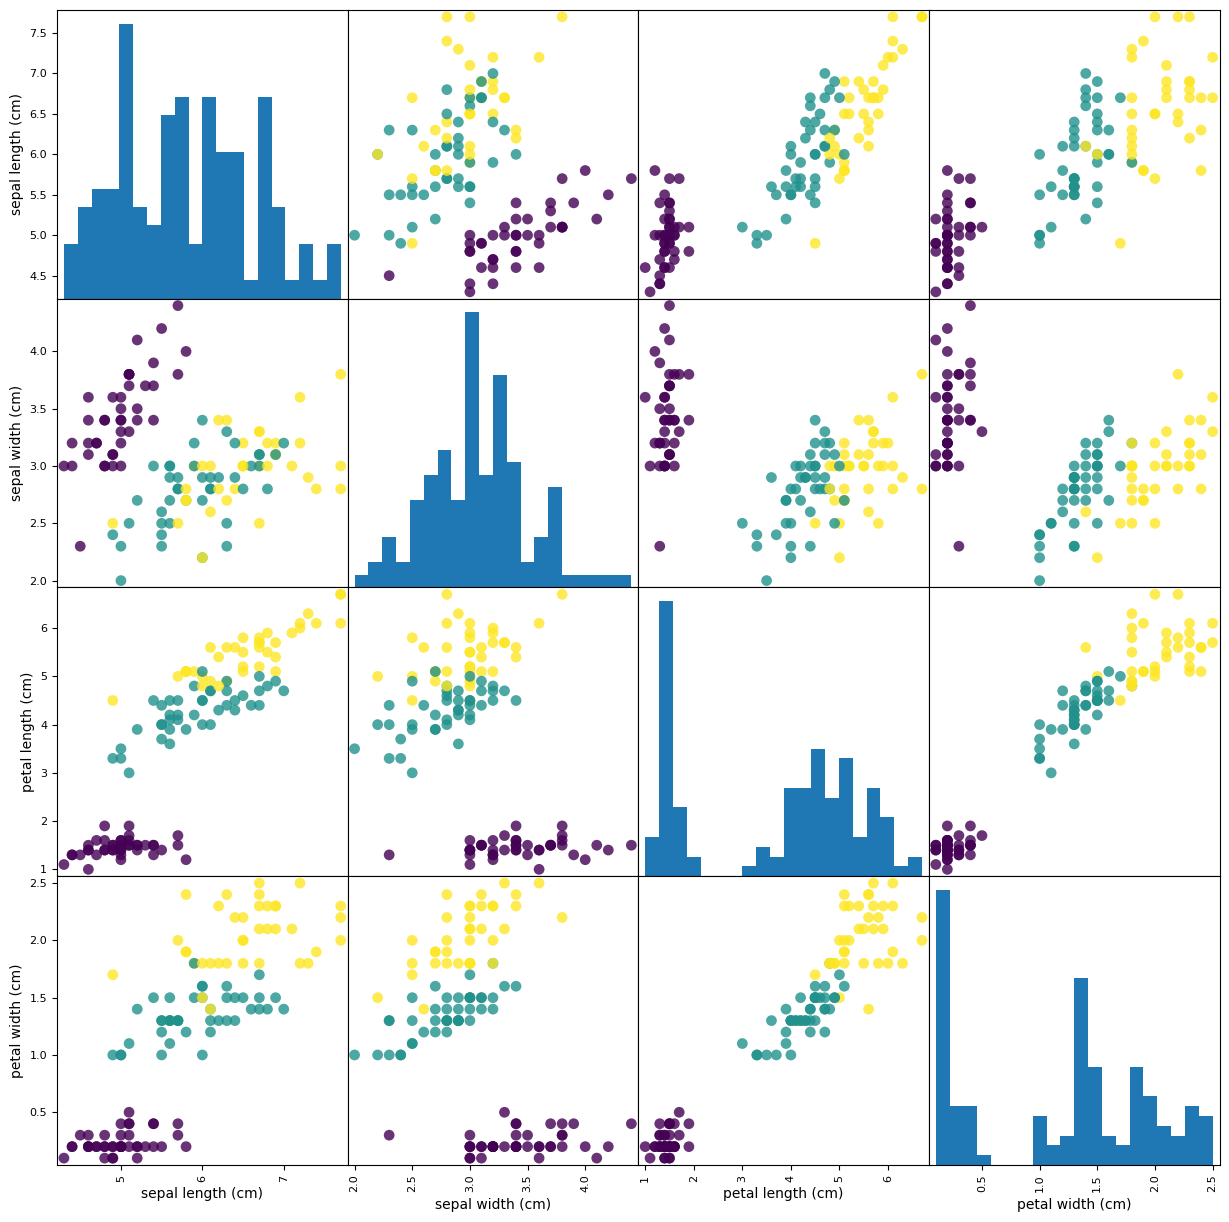

In [ ]:
import pandas as pd
#X_train 데이터를 사용해서 데이터프레임을 만듬.

# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용
iris_dataframe = pd.DataFrame(X_train,columns = iris_dataset.feature_names)

#데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듬
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (15,15),
                           marker='o', hist_kwds={'bins':20}, s=60, alpha =0.8)

### 첫번째 머신러닝 모델 : K-최근접 이웃 알고리즘

- 새로운 데이터 포인트에 대한 예측이 필요하면 알고리즘은 새 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 찾음. 그런 다음 찾은 훈련 데이터의 레이블을 새 데이터 포인트의 레이블로 지정

- k는 가장 가까운 이웃 '하나'가 아니라 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k'개의 이웃을 찾는다는 뜻.

- 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn.fit(X_train,y_train) #모의고사로 훈련.

KNeighborsClassifier()

#### 예측하기

- 야생에서 꽃받침의 길이가 5cm,폭이 2.9cm이고 꽃잎의 길이가 1cm,  폭이 0.2cm 인 붓꽃을 보았다고 가정. 이게 무슨 품종인지 맞추는 것을 예측한다고 하자

In [ ]:
import numpy as np
X_new = np.array([[7, 3, 2, 1]])
print('X_new.shape : {}'.format(X_new.shape))

X_new.shape : (1, 4)


scikit-learn은 항상 데이터가 2차원 배열일 것으로 예상.

In [ ]:
prediction = knn.predict(X_new)
print('예측 : {}'.format(prediction))
print('예측한 타깃의 이름 : {}'.format(iris_dataset['target_names'][prediction]))

예측 : [0]
예측한 타깃의 이름 : ['setosa']


### 모델의 신뢰 -> 모델 평가하기

In [ ]:
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값 :\n {}'.format(y_pred))

테스트 세트에 대한 예측값 :
 [2 2 0 2 0 0 1 1 0 1 1 2 1 2 2 0 1 2 2 1 0 0 2 0 2 2 2 0 1 2]


In [ ]:
print('테스트 세트에 대한 정확도 : {:.2f}'.format(np.mean(y_pred == y_test)))

테스트 세트에 대한 정확도 : 1.00


의사 결정 트리 머신러닝 학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

의사결정 트리 머신러닝 테스트/평가

In [ ]:
from sklearn.metrics import accuracy_score

pred = dt_clf.predict(X_test)
ac_score = accuracy_score(y_test, pred)

print('예측 정확도 : ', ac_score)

예측 정확도 :  0.9666666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

랜덤포레스트 트리 머신러닝 테스트/평가

In [ ]:
from sklearn.metrics import accuracy_score

pred = rf_clf.predict(X_test)
ac_score = accuracy_score(y_test, pred)

print('예측 정확도 : ', ac_score)

예측 정확도 :  0.9666666666666667


In [ ]:
rf_clf.predict_proba(X_test)

array([[0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.44, 0.56],
       [0.  , 0.  , 1.  ],
       [0.  , 0.99, 0.01],
       [0.94, 0.06, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.67, 0.33],
       [0.  , 0.19, 0.81],
       [0.99, 0.01, 0.  ],
       [0.  , 0.83, 0.17],
       [0.  , 0.03, 0.97]])

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=11)
xgb.fit(X_train,y_train)

from sklearn.metrics import accuracy_score

pred = xgb.predict(X_test)
ac_score = accuracy_score(y_test, pred)

print('예측 정확도 : ', ac_score)

예측 정확도 :  0.9333333333333333


## 사이킷런 데이터 전처리


1. 레이블 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', 'TV', '냉장고', '컴퓨터', '컴퓨터']

encoder = LabelEncoder()
# encoder.fit(items)
# labels = encoder.transform(items)
labels = encoder.fit_transform(items)

print('인코딩 변환값 : ', labels)
print('인코딩 클래스 : ', encoder.classes_)

인코딩 변환값 :  [0 1 2 3 0 1 3 3]
인코딩 클래스 :  ['TV' '냉장고' '전자레인지' '컴퓨터']


2. 레이블 디코딩

In [ ]:
origins = encoder.inverse_transform([0, 1, 2, 3, 0, 1, 3, 3])

print('디코딩 원본값 : ', origins)

디코딩 원본값 :  ['TV' '냉장고' '전자레인지' '컴퓨터' 'TV' '냉장고' '컴퓨터' '컴퓨터']


3. 원-핫 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

labels = labels.reshape(-1, 1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
#on_labels = oh_encoder.fit_transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
원-핫 인코딩 데이터 차원
(8, 4)


4. 판다스의 원-핫 인코딩

In [ ]:
import pandas as pd

item_df = pd.DataFrame({'item':items})
print(pd.get_dummies(item_df))

   item_TV  item_냉장고  item_전자레인지  item_컴퓨터
0        1         0           0         0
1        0         1           0         0
2        0         0           1         0
3        0         0           0         1
4        1         0           0         0
5        0         1           0         0
6        0         0           0         1
7        0         0           0         1


5. 스케일링 데이터세트 훑어보기

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값 :\n', iris_df.mean())
print('feature 들의 분산 값 :\n', iris_df.var())

feature 들의 평균 값 :
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
feature 들의 분산 값 :
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


6. 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 들의 평균 값 :\n', iris_df_scaled.mean())
print('feature 들의 분산 값 :\n', iris_df_scaled.var())

feature 들의 평균 값 :
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature 들의 분산 값 :
 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


7. 최대-최소 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 들의 최소 값 :\n', iris_df_scaled.min())
print('feature 들의 최대 값 :\n', iris_df_scaled.max())

feature 들의 최소 값 :
 sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature 들의 최대 값 :
 sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


8. 스케일링 주의사항

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0,11).reshape(-1, 1)
test_array = np.arange(0,6).reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 : ', np.round(train_array.reshape(-1), 2))
print('Scaled train_array 데이터 : ', np.round(train_scaled.reshape(-1), 2))

#scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print('\n원본 test_array 데이터 : ', np.round(test_array.reshape(-1), 2))
print('Scaled test_array 데이터 : ', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
Scaled train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터 :  [0 1 2 3 4 5]
Scaled test_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5]


## mtcars

- mpg : Miles/(US) gallon
- cyl : Number of cylinders
- disp : Displacement (cu.in.)
- hp : 	Gross horsepower
- drat : Rear axle ratio
- wt : 	Weight (1000 lbs)
- qsec : 1/4 mile time
- vs : 	Engine (0 = V-shaped, 1 = straight)
- am : 	Transmission (0 = automatic, 1 = manual)
- gear : Number of forward gears
- carb : Number of carburetors

### 작업형 예시 1

#### mtcars 데이터셋(data/mtcars.csv)의 qsec 컬럼을 최소최대 척도(Min-Max Scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.(* dataset 위치 : data/mtcars.csv)

In [11]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/3%EC%9D%BC%EC%B0%A8/mtcars.csv',index_col=0)
data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
# print(data_scaled)

condition = data_scaled['qsec'] > 0.5
print(data_scaled[condition]['qsec'])
print(data_scaled[condition]['qsec'].count())

3     0.588095
5     0.680952
7     0.654762
8     1.000000
10    0.523810
17    0.591667
19    0.642857
20    0.655952
25    0.523810
Name: qsec, dtype: float64
9


결측값 확인하기

In [14]:
print("qsec결측값", data['qsec'].isnull().sum())
#print(mtcars['qsec'].value_counts())

qsec결측값 0


이상치 제거하니 / IQR방식으로 제거해야함.

In [16]:
data_qsec_q3 = data['qsec'].quantile(0.75)
data_qsec_q1 = data['qsec'].quantile(0.25)
print('q3:',data_qsec_q3,'q1:',data_qsec_q1)
qsec_iqr = data_qsec_q3 - data_qsec_q1
print('iqr:',qsec_iqr)

q3: 18.9 q1: 16.8925
iqr: 2.0075000000000003


In [18]:
mtcars_iqr = data[(data['qsec'] > data_qsec_q1 - qsec_iqr*1.5) & (data['qsec'] < data_qsec_q3 + qsec_iqr*1.5)]
print(mtcars_iqr.shape)

(31, 11)


MinMax스케일러 불러오기 minmax 정규화/ 값을 0~1 사의 값으로 전환하는 것. 이상값의 영향을 많이 받음.


In [19]:
qsec_max = mtcars_iqr['qsec'].max()
qsec_min = mtcars_iqr['qsec'].min()
qsec_d = qsec_max - qsec_min
print('최대값:',qsec_max,'최소값:',qsec_min ,"차이:",qsec_d)

mtcars_new = mtcars_iqr.copy()
mtcars_new['qsec_new'] = (mtcars_iqr['qsec']- qsec_min) / (qsec_max - qsec_min)
mtcars_new['qsec_new']

최대값: 20.22 최소값: 14.5 차이: 5.719999999999999


Mazda RX4              0.342657
Mazda RX4 Wag          0.440559
Datsun 710             0.718531
Hornet 4 Drive         0.863636
Hornet Sportabout      0.440559
Valiant                1.000000
Duster 360             0.234266
Merc 240D              0.961538
Merc 280               0.664336
Merc 280C              0.769231
Merc 450SE             0.506993
Merc 450SL             0.541958
Merc 450SLC            0.611888
Cadillac Fleetwood     0.608392
Lincoln Continental    0.580420
Chrysler Imperial      0.510490
Fiat 128               0.868881
Honda Civic            0.702797
Toyota Corolla         0.944056
Toyota Corona          0.963287
Dodge Challenger       0.414336
AMC Javelin            0.489510
Camaro Z28             0.159091
Pontiac Firebird       0.445804
Fiat X1-9              0.769231
Porsche 914-2          0.384615
Lotus Europa           0.419580
Ford Pantera L         0.000000
Ferrari Dino           0.174825
Maserati Bora          0.017483
Volvo 142E             0.716783
Name: qs

## HousePrices

- 데이터명 : Boston Housing Price (보스턴 주택 가격 데이터)
- 레코드수 : 506 개
- 필드개수 :  14 개
- 데이터설명 : 보스턴 시의 주택 가격에 대한 데이터이다.

- 주택의 여러가진 요건들과 주택의 가격 정보가 포함되어 있다. 주택의 가격에 영향을 미치는 요소를 분석하고자 하는 목적으로 사용될 수 있다. 회귀분석 등의 분석에 활용될 수 있다.
보스턴 주택 데이터는 여러 개의 측정지표들 (예를 들어, 범죄율, 학생/교사 비율 등)을 포함한, 보스턴 인근의 주택 가격의 중앙값(median value)이다. 이 데이터 집합은 14개의 변수를 포함하고 있다.

- 필드의 이해 :
데이터의 이해를 돕기 위해 포함된 14개의 변수에 대하여 간략하게 설명한다.
위 14개의 필드는 입력 변수로 사용되고, 맨 아래의 Play 속성이 목표(종속) 변수로 사용된다.

- CRIM : 지역별 점외 발생률
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율
- NDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위차한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000 달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
-  MEDV : 본인 소유의 주택가격(중앙값)

#### 312-01 : csv파일 불러오기

In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/AnalyticsKnight/yemoonsaBigdata/main/datasets/Part2/housing_data.csv", header=None, sep=',')
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue']
data.columns = col_names

In [ ]:
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  isHighValue  
0     15.3  396.90   4.98  24.0            0  
1     17.8  396.90   9.14  21.6            0  
2     17.8  392.83   4.03  34.7            1  
3     18.7  394.63   2.94  33.4            1  
4     18.7  396.90   5.33  36.2            1  


## 2. 데이터 전처리

### (1) 데이터 확인

#### 321-01 : shape 함수

In [ ]:
print(data.shape)

(526, 15)


#### 321-02 : info 함수

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOX          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TAX          526 non-null    float64
 10  PTRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB
None


#### 321-03 : describe 함수

In [ ]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     3.613524   10.931559   11.306616    0.066540    0.555954    6.271076   
std      8.601545   22.977112    6.934739    0.249461    0.113854    0.698140   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.453000    5.879250   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.183500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.613500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    68.816540    3.742880    9.416350  410.547529   18.513308  357.888099   
std     27.868375    2.0836

### (2) 결측치 처리

#### 322-01 : 결측치 개수 확인

In [ ]:
print(data.isnull().sum())

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64


#### 322-02 : 결측치 비율 확인

In [ ]:
print(data.isnull().sum()/data.shape[0])

CRIM           0.038023
ZN             0.000000
INDUS          0.000000
CHAS           0.000000
NOX            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TAX            0.000000
PTRATIO        0.000000
B              0.000000
LSTAT          0.000000
MEDV           0.000000
isHighValue    0.000000
dtype: float64


#### 322-03 : 결측치 대체 (중앙값)

In [ ]:
data1 = data.copy()
med_val = data['CRIM'].median()
data1['CRIM'] = data1['CRIM'].fillna(med_val)

#### 322-04 : 결측치 제거

In [ ]:
data = data.loc[data['CRIM'].notnull(), ]
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### (3) 이상치 처리

#### 323-01 : MEDV변수 박스 플롯

<Axes: >

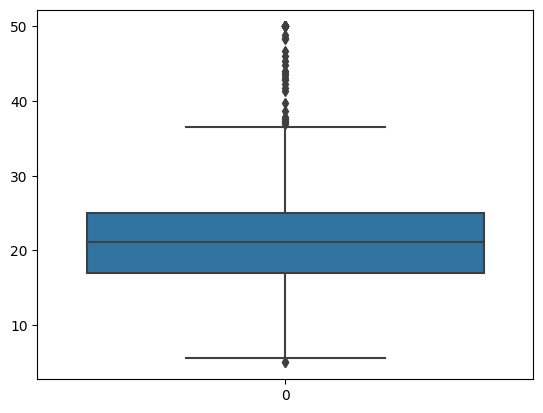

In [ ]:
import seaborn as sns

sns.boxplot(data['MEDV'])

#### 323-02 : IQR값 기준 이상치

In [ ]:
Q1, Q3 = data['MEDV'].quantile([0.25, 0.75])
IQR = Q3-Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print('outlier 범위: %.2f 초과 또는 %.2f 미만' % (upper_bound, lower_bound))
print('outlier 개수: %.0f' % len(data[(data['MEDV']>upper_bound)|(data['MEDV']<lower_bound)]))
print('outlier 비율: %.2f' % (len(data[(data['MEDV']>upper_bound)|(data['MEDV']<lower_bound)])/len(data)))

outlier 범위: 36.96 초과 또는 5.06 미만
outlier 개수: 40
outlier 비율: 0.08


#### 323-03 : IQR값 기준 이상치 함수화

In [ ]:
def get_outlier_prop(x):

  Q1, Q3 = x.quantile([0.25, 0.75])
  IQR = Q3-Q1
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR
  outliers = x[(x>upper_bound)|(x<lower_bound)]

  return str(round(100*len(outliers)/len(x), 1))+'%'

print(data.apply(get_outlier_prop))

CRIM           13.0%
ZN             13.4%
INDUS           0.0%
CHAS            6.9%
NOX             0.0%
RM              5.9%
AGE             0.0%
DIS             1.0%
RAD             0.0%
TAX             0.0%
PTRATIO         3.0%
B              15.2%
LSTAT           1.4%
MEDV            7.9%
isHighValue     0.0%
dtype: object


#### 323-04 : 이상치 제거 예시1

In [ ]:
# 예시1) IQR 값 기준으로 MEDV 변수의 이상치를 제거
Q1, Q3 = data['MEDV'].quantile([0.25, 0.75])
IQR = Q3-Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

data1 = data[(data['MEDV']<=upper_bound)&(data['MEDV']>=lower_bound)]
print(data1.shape)

(466, 15)


#### 323-05 :  이상치 제거 예시2

In [ ]:
# 예시2) MEDV 변수 값이 45 이상인 경우를 이상치로 보고 제거
data2 = data[~(data['MEDV']>=45)]
print(data2.shape)

(484, 15)


### (4) 변수 변환

#### 324-01 : 변수 분포 확인

<ipython-input-32-bc925622b2da>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols[idx]], ax=axs[_row][_col])
<ipython-input-32-bc925622b2da>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols[idx]], ax=axs[_row][_col])
<ipython-input-32-bc925622b2da>:11: UserWarning: 

`distpl

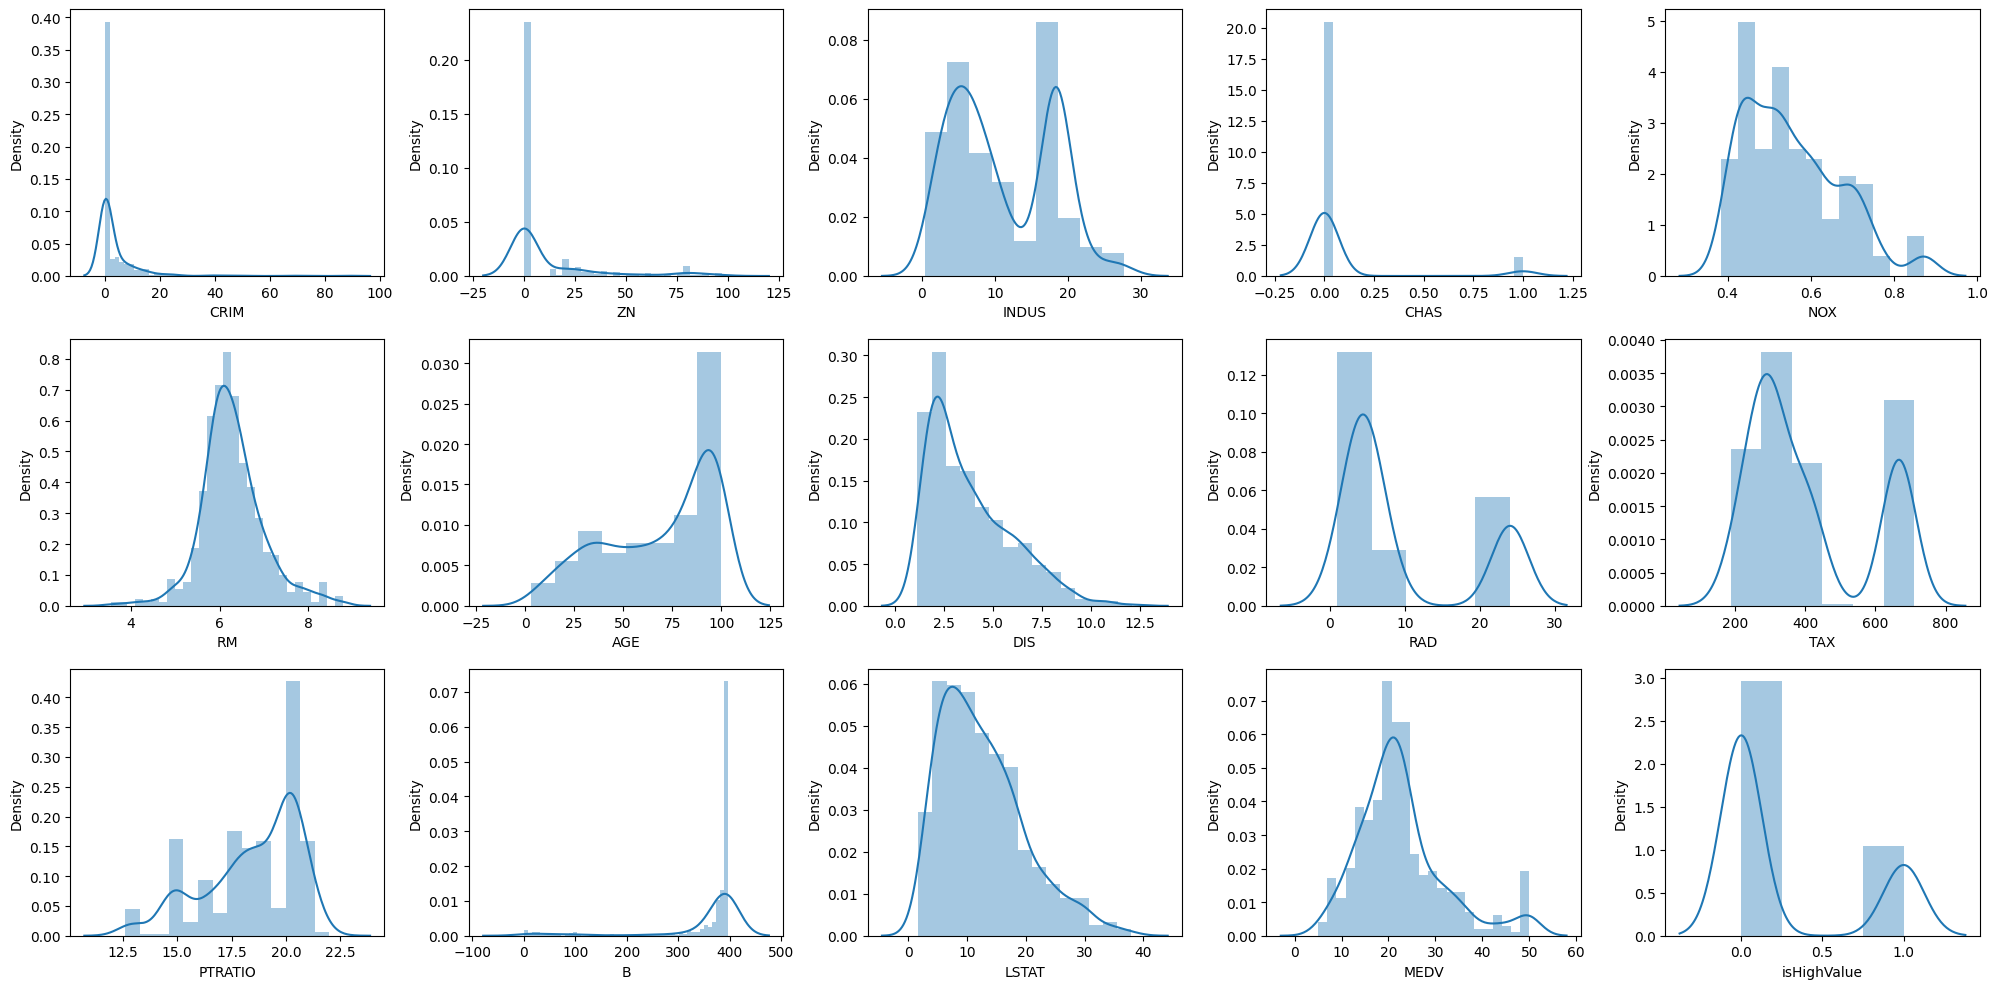

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = data.columns

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
idx = 0
for _row in range(3):
  for _col in range(5):
    if idx < len(cols):
      sns.distplot(data[cols[idx]], ax=axs[_row][_col])
      idx+=1

plt.tight_layout()


#### 324-02 : 변수 왜도 확인

In [ ]:
print(data.apply(lambda x: x.skew(), axis=0))

CRIM           5.223149
ZN             2.225666
INDUS          0.295022
CHAS           3.405904
NOX            0.729308
RM             0.403612
AGE           -0.598963
DIS            1.011781
RAD            1.004815
TAX            0.669956
PTRATIO       -0.802325
B             -2.890374
LSTAT          0.906460
MEDV           1.108098
isHighValue    1.092403
dtype: float64


#### 324-03 : 로그 변환

In [ ]:
import numpy as np

data['CRIM'] = np.log1p(data['CRIM'])
print(data['CRIM'].skew())

1.2692005882725572


## 3. 회귀 모델링

### (1) 데이터 탐색

#### 331-01 : 데이터 생성

In [ ]:
df_r = data.drop(['isHighValue'], axis=1)

#### 331-02 : 변수 상관관계 확인

In [ ]:
cols = ['MEDV', 'LSTAT', 'RM', 'CHAS', 'RAD', 'TAX']
print(df_r[cols].corr())

           MEDV     LSTAT        RM      CHAS       RAD       TAX
MEDV   1.000000 -0.737663  0.695360  0.175260 -0.381626 -0.468536
LSTAT -0.737663  1.000000 -0.613808 -0.053929  0.488676  0.543993
RM     0.695360 -0.613808  1.000000  0.091251 -0.209847 -0.292048
CHAS   0.175260 -0.053929  0.091251  1.000000 -0.007368 -0.035587
RAD   -0.381626  0.488676 -0.209847 -0.007368  1.000000  0.910228
TAX   -0.468536  0.543993 -0.292048 -0.035587  0.910228  1.000000


### (2) 분석 모형 구축

#### 332-01 : 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

X_cols = ['LSTAT', 'PTRATIO', 'TAX', 'AGE', 'NOX', 'INDUS', 'CRIM']

X = df_r[X_cols].values
y = df_r['MEDV'].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.3, random_state=123)

#### 332-02 : 데이터 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

#### 332-03 : 선형 회귀 학습

In [ ]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_r_scaled, y_train_r)

LinearRegression()

#### 332-04 : coef_

In [ ]:
print(model_lr.coef_)

[-32.51042803 -11.94191767  -3.84240793   5.58034429  -4.34593586
   0.98706819   6.83941179]


#### 332-05 : intercept_

In [ ]:
print(model_lr.intercept_)

38.03006298623824


#### 332-06 : SVM 학습

In [ ]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_r_scaled, y_train_r)

SVR()

#### 332-07 : 랜덤 포레스트 학습

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(random_state=123)
model_rfr.fit(X_train_r_scaled, y_train_r)

RandomForestRegressor(random_state=123)

#### 332-08 : feature_importances_

In [ ]:
for x, val in zip(X_cols, model_rfr.feature_importances_):
  print(f'{x} : %.3f' %val)

LSTAT : 0.718
PTRATIO : 0.070
TAX : 0.040
AGE : 0.038
NOX : 0.056
INDUS : 0.013
CRIM : 0.064


### (3) 분석 모형 평가

#### 333-01 : 예측값 생성

In [ ]:
y_pred_lr = model_lr.predict(X_test_r_scaled)
y_pred_svr = model_svr.predict(X_test_r_scaled)
y_pred_rfr = model_rfr.predict(X_test_r_scaled)

#### 333-02 : 평가지표 계산

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('-'*30)
print('선형 회귀 결과')
print('MAE: %.3f' %mean_absolute_error(y_test_r, y_pred_lr))
print('MSE: %.3f' %mean_squared_error(y_test_r, y_pred_lr))
print('MAPE: %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_lr))
print('-'*30)
print('SVM 결과')
print('MAE: %.3f' %mean_absolute_error(y_test_r, y_pred_svr))
print('MSE: %.3f' %mean_squared_error(y_test_r, y_pred_svr))
print('MAPE: %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_svr))
print('-'*30)
print('랜덤 포레스트 결과')
print('MAE: %.3f' %mean_absolute_error(y_test_r, y_pred_rfr))
print('MSE: %.3f' %mean_squared_error(y_test_r, y_pred_rfr))
print('MAPE: %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_rfr))
print('-'*30)

------------------------------
선형 회귀 결과
MAE: 4.408
MSE: 34.861
MAPE: 0.223
------------------------------
SVM 결과
MAE: 3.846
MSE: 36.890
MAPE: 0.170
------------------------------
랜덤 포레스트 결과
MAE: 2.967
MSE: 17.955
MAPE: 0.147
------------------------------


## 4. 분류 모델링

### (1) 데이터 탐색

#### 341-01 : 데이터 생성

In [ ]:
df_c = data.drop(['MEDV'], axis=1)

#### 341-02 : LSTAT변수 박스 플롯

<Axes: xlabel='isHighValue', ylabel='LSTAT'>

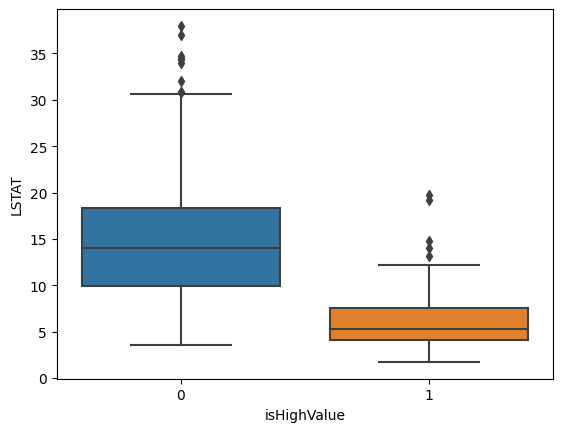

In [ ]:
import seaborn as sns

sns.boxplot(x='isHighValue', y='LSTAT', data=df_c)

#### 341-03 : LSTAT변수 kde 플롯

<Axes: xlabel='LSTAT', ylabel='Density'>

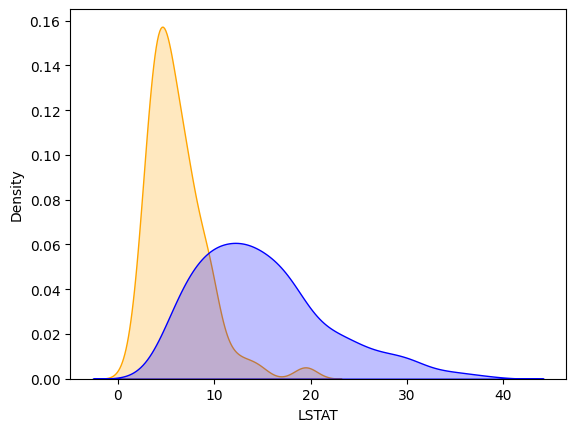

In [ ]:
import seaborn as sns

sns.kdeplot(df_c.loc[df_c['isHighValue']==1, 'LSTAT'], color='orange', fill=True)
sns.kdeplot(df_c.loc[df_c['isHighValue']==0, 'LSTAT'], color='blue', fill=True)

#### 341-04 : isHighValue값별 변수 평균

In [ ]:
import numpy as np

print(df_c.groupby('isHighValue').apply(np.mean).T)

isHighValue           0           1
CRIM           0.975497    0.354194
ZN             6.691176   24.602273
INDUS         12.777353    6.488485
CHAS           0.050802    0.121212
NOX            0.575957    0.494454
RM             6.028837    7.009394
AGE           73.275134   55.257576
DIS            3.593655    4.365642
RAD           10.729947    6.204545
TAX          440.788770  316.007576
PTRATIO       18.994920   16.927273
B            346.706738  384.914697
LSTAT         14.949652    6.146061
isHighValue    0.000000    1.000000


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### (2) 분석 모형 구축

#### 342-01 : 데이터 분할





In [ ]:
from sklearn.model_selection import train_test_split

X_cols = ['LSTAT', 'PTRATIO', 'TAX', 'AGE', 'NOX', 'INDUS', 'CRIM']

X = data[X_cols].values
y = data['isHighValue'].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.3, random_state=123)

#### 342-02 : 데이터 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

#### 342-03 : 로지스틱 회귀 학습

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lo = LogisticRegression()
model_lo.fit(X_train_c_scaled, y_train_c)

LogisticRegression()

#### 342-04 : coef_

In [ ]:
print(model_lo.coef_)

[[-4.67917856 -2.26271976 -0.80852617  0.45926521 -0.32914015 -1.36930599
   0.86834454]]


#### 342-05 : intercept_

In [ ]:
print(model_lo.intercept_)

[1.90334599]


#### 342-06 : SVM 학습

In [ ]:
from sklearn.svm import SVC

model_svc = SVC(probability=True)
model_svc.fit(X_train_c_scaled, y_train_c)

SVC(probability=True)

#### 342-07 : 랜덤 포레스트 학습

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=123)
model_rfc.fit(X_train_c_scaled, y_train_c)

RandomForestClassifier(random_state=123)

#### 342-08 : feature_importances_

In [ ]:
for x, val in zip(X_cols, model_rfc.feature_importances_):
  print(f'{x} : %.3f' %val)

LSTAT : 0.378
PTRATIO : 0.105
TAX : 0.112
AGE : 0.087
NOX : 0.080
INDUS : 0.134
CRIM : 0.104


### (3) 분석 모형 평가

#### 343-01 : 예측값 생성

In [ ]:
y_pred_lo = model_lo.predict(X_test_c_scaled)
y_pred_svc = model_svc.predict(X_test_c_scaled)
y_pred_rfc = model_rfc.predict(X_test_c_scaled)

#### 343-02 : 평가지표 계산

In [ ]:
from sklearn.metrics import classification_report

print('-'*60)
print('로지스틱 회귀 결과')
print(classification_report(y_test_c, y_pred_lo, labels=[0,1]))
print('-'*60)
print('SVM 결과')
print(classification_report(y_test_c, y_pred_svc, labels=[0,1]))
print('-'*60)
print('랜덤포레스트 결과')
print(classification_report(y_test_c, y_pred_rfc, labels=[0,1]))
print('-'*60)

------------------------------------------------------------
로지스틱 회귀 결과
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       115
           1       0.89      0.65      0.75        37

    accuracy                           0.89       152
   macro avg       0.89      0.81      0.84       152
weighted avg       0.89      0.89      0.89       152

------------------------------------------------------------
SVM 결과
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.84      0.73      0.78        37

    accuracy                           0.90       152
   macro avg       0.88      0.84      0.86       152
weighted avg       0.90      0.90      0.90       152

------------------------------------------------------------
랜덤포레스트 결과
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       115
           1       0.86   

#### 343-03 : AUROC 계산

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_lo = model_lo.predict_proba(X_test_c_scaled)[:, 1]
y_pred_svc = model_svc.predict_proba(X_test_c_scaled)[:, 1]
y_pred_rfc = model_rfc.predict_proba(X_test_c_scaled)[:, 1]

print('로지스틱 회귀 결과: %.3f' %roc_auc_score(y_test_c, y_pred_lo))
print('SVM 결과: %.3f' %roc_auc_score(y_test_c, y_pred_svc))
print('랜덤포레스트 결과: %.3f' %roc_auc_score(y_test_c, y_pred_rfc))

로지스틱 회귀 결과: 0.918
SVM 결과: 0.937
랜덤포레스트 결과: 0.966


- Boston house dataset은 1.0부터 사라짐. 버전 downgrade가 필요.

In [ ]:
# !pip uninstall scikit-learn
!pip install scikit-learn==1.0.2

## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


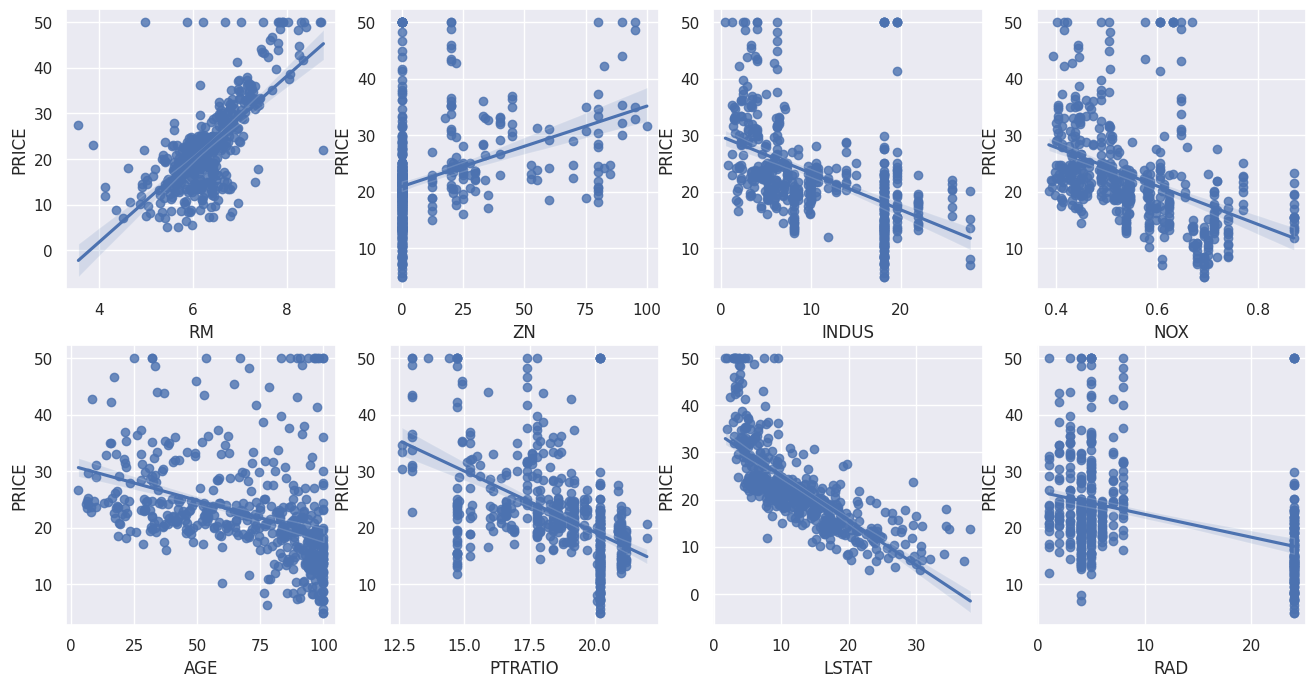

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train ,y_train ) # model이 train을 하여라.
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [ ]:
print('절편 값:',lr.intercept_)
print(lr.coef_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164485
[-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### K-fold cross validation
K 겹 교차 검증(Cross validation)이란 통계학에서 모델을 "평가" 하는 한 가지 방법입니다. 소위 hold-out validation 이라 불리는 전체 데이터의 일부를 validation set 으로 사용해 모델 성능을 평가하는 것의 문제는 데이터셋의 크기가 작은 경우 테스트셋에 대한 성능 평가의 신뢰성이 떨어지게 된다는 것입니다. 만약 테스트셋을 어떻게 잡느냐에 따라 성능이 다르면, 우연의 효과로 인해 모델 평가 지표에 편향이 생기게 됩니다.



이를 해결하기 위해 K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다. 첫 번째 Iteration에서는 BCDE를 트레이닝 셋으로, A를 테스트셋으로 설정한 후, 성능을 평가합니다. 두 번째 Iteration에서는 ACDE를 트레이닝셋으로, B를 테스트셋으로하여 성능을 평가합니다. 그러면 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가하게 됩니다. (아래 데이터는 모두 사실은 트레이닝 데이터입니다. Iteration이라는 상황안에서만 테스트셋이 되는 것입니다.) 이 때, 데이터를 몇 개로 쪼갰느냐가 K-겹 교차검증의 K가 됩니다.

<figure>
    <img src='https://t1.daumcdn.net/cfile/tistory/990DD2465B72F1491E' width=500 height=300>
</figure>



출처: https://3months.tistory.com/321 [Deep Play]

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# K-Fold cross validaition 설명 및 그림 붙이기(02/19)?
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 왜 음수로 코딩(02/19)?
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
# 회귀의 값은 작아지면 좋으니깐 마이너스를 취하면 작으면 작아지는게 좋음 (사람마다 다를듯)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
